# Logistic Regression

In [39]:
from warnings import filterwarnings
filterwarnings('ignore')

# read iris.csv file

In [40]:
import pandas as pd 
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#Seprate x and y 

In [43]:
X = df.drop(columns=['species'])

In [44]:
Y = df[['species']]

In [45]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa



# Create Preprocessing Pipeline 

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler

In [48]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
            ('scaler',StandardScaler())])

In [49]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [50]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [51]:
cols = num_pipe.get_feature_names_out()
cols[0:5]

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [52]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


#  TRAIN TEST SPLIT 

In [53]:
from sklearn.model_selection import train_test_split
xtrain, xtest , ytrain ,ytest = train_test_split(X_pre,Y)

In [54]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
74,0.674501,-0.362176,0.308059,0.132510
133,0.553333,-0.592373,0.762758,0.395774
91,0.310998,-0.131979,0.478571,0.264142
132,0.674501,-0.592373,1.046945,1.317199
3,-1.506521,0.098217,-1.283389,-1.315444


In [55]:
xtrain.shape

(112, 4)

In [56]:
xtest.shape

(38, 4)

In [57]:
ytrain.head()


,species
74,versicolor
133,virginica
91,versicolor
132,virginica
3,setosa


In [58]:
ytest.head()

,species
21,setosa
30,setosa
145,virginica
8,setosa
89,versicolor


CREATE A LOGISTIC REGRESSION MODEL

In [1]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

NameError: name 'xtrain' is not defined

#   EVALUATE MODEL ACCURACY IN TEST AND TRAIN

In [60]:
model.score(xtrain,ytrain)

0.9732142857142857

In [61]:
model.score(xtest,ytest)

0.9736842105263158

PREDICT TRAIN AND TEST RESULT 

In [62]:
ypred_tr = model.predict(xtrain)
ypred_tr[0:5]

array(['versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa'],
      dtype=object)

In [63]:
ypred_ts = model.predict(xtest)
ypred_ts[0:5]

array(['setosa', 'setosa', 'virginica', 'setosa', 'versicolor'],
      dtype=object)

# PROBABILITY OF THE CLASSES 

In [64]:
yprob_ts = model.predict_proba(xtest)
yprob_ts[0:5]

array([[9.82169974e-01, 1.78296707e-02, 3.55736742e-07],
       [9.48080419e-01, 5.19184803e-02, 1.10080970e-06],
       [7.80540479e-05, 4.61209256e-02, 9.53801020e-01],
       [9.61471042e-01, 3.85281464e-02, 8.11880705e-07],
       [2.63857846e-02, 8.70670337e-01, 1.02943879e-01]])

In [65]:
yprob_tr = model.predict_proba(xtrain)
yprob_tr[0:5]

array([[1.31269478e-02, 8.93988647e-01, 9.28844049e-02],
       [2.88374388e-03, 5.47898546e-01, 4.49217710e-01],
       [1.93093477e-02, 8.08238100e-01, 1.72452552e-01],
       [4.07617181e-05, 3.16402453e-02, 9.68318993e-01],
       [9.66470987e-01, 3.35283880e-02, 6.25442241e-07]])

#   PLOT THE CONFUSION MATRIX FOR TEST

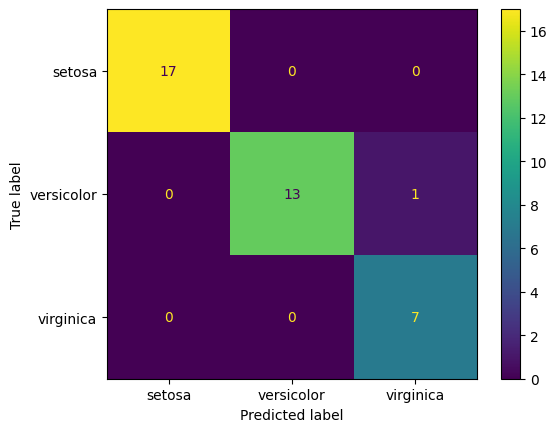

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

# PRINT CLASSIFICATION REPORT 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.96        14
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        38
   macro avg       0.96      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# CROSS VALIDATION 

In [68]:
from sklearn.model_selection import cross_val_score


In [69]:
acc_score = cross_val_score(model,xtrain,ytrain , cv=5, scoring='accuracy')
acc_score.mean()

0.9549407114624506

In [72]:
F1_score = cross_val_score(model,xtrain,ytrain , cv=5, scoring='f1_macro')
F1_score.mean()

0.9578989706543887

In [73]:
precision_score = cross_val_score(model,xtrain,ytrain , cv=5, scoring='precision_macro')
precision_score.mean()

0.960925925925926

In [74]:
recall_score = cross_val_score(model,xtrain,ytrain , cv=5, scoring='recall_macro')
recall_score.mean()

0.9578042328042329

# PREDICTING OUT OF SAMPLE DATA ( APPLY ALWAYS .TRANSFORM )

In [76]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [77]:
xnew.isna().sum()

sepal_length    0
sepal_width     1
petal_length    1
petal_width     1
dtype: int64

In [79]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

array([[-0.41600969, -1.28296331,  0.13754657,  0.13250973],
       [ 1.2803405 ,  0.09821729,  0.76275827,  1.44883158],
       [-0.90068117, -1.28296331, -0.4308277 , -0.13075464],
       [-1.74885626, -0.36217625,  0.        , -1.3154443 ],
       [ 0.06866179, -0.13197948,  0.76275827,  0.79067065],
       [-0.41600969,  1.01900435, -1.39706395, -1.3154443 ],
       [-0.29484182,  0.        , -0.08980313,  0.13250973],
       [ 0.79566902, -0.13197948,  0.8195957 ,  1.05393502],
       [-0.65834543,  1.47939788, -1.2833891 , -1.3154443 ],
       [-0.90068117,  0.78880759, -1.2833891 ,  0.        ],
       [ 0.31099753, -0.59237301,  0.13754657,  0.13250973],
       [-0.41600969, -1.51316008, -0.03296571, -0.26238682],
       [ 2.24968346, -0.13197948,  1.33113254,  1.44883158],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [ 0.18982966, -1.97355361,  0.70592084,  0.3957741 ]])

In [81]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


# PREDICT THE VALUES 

In [82]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [84]:
prob = model.predict_proba(xnew_pre)
prob

array([[2.63857846e-02, 8.70670337e-01, 1.02943879e-01],
       [1.02418978e-04, 5.96235939e-02, 9.40273987e-01],
       [1.56376305e-01, 8.32632175e-01, 1.09915198e-02],
       [7.68518399e-01, 2.31358081e-01, 1.23519301e-04],
       [4.33793992e-03, 3.02539404e-01, 6.93122656e-01],
       [9.55394452e-01, 4.46051793e-02, 3.68442646e-07],
       [1.54558198e-01, 8.17723593e-01, 2.77182089e-02],
       [4.97739985e-04, 1.44392225e-01, 8.55110035e-01],
       [9.79464999e-01, 2.05348260e-02, 1.75346442e-07],
       [9.00247617e-01, 9.96694321e-02, 8.29511600e-05],
       [2.22161674e-02, 9.06111689e-01, 7.16721434e-02],
       [3.82478875e-02, 9.38109845e-01, 2.36422675e-02],
       [1.78055199e-06, 1.45173247e-02, 9.85480895e-01],
       [3.55303866e-03, 7.03217934e-01, 2.93229028e-01],
       [6.50728686e-04, 3.94409688e-01, 6.04939584e-01]])

In [85]:
prob[0].max()

0.8706703368876755

In [86]:
max_prob = []
for i in prob:
    max_prob.append(i.max())

In [87]:
max_prob

[0.8706703368876755,
 0.9402739871108636,
 0.8326321748074367,
 0.7685183994987649,
 0.693122655996181,
 0.9553944522708603,
 0.8177235931164282,
 0.855110035461841,
 0.9794649986821309,
 0.900247616774106,
 0.906111689211944,
 0.9381098449847558,
 0.9854808947872109,
 0.7032179338353904,
 0.6049395836780994]

# SAVE PREDICTION AND PROBABLITIES IN XNEW

In [88]:
xnew['species_pred']= preds
xnew['species_prob']=max_prob

In [89]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,species_prob
0,5.5,2.5,4.0,1.3,versicolor,0.870670
1,6.9,3.1,5.1,2.3,virginica,0.940274
2,5.1,2.5,3.0,1.1,versicolor,0.832632
3,4.4,2.9,NaN,0.2,setosa,0.768518
4,5.9,3.0,5.1,1.8,virginica,0.693123
5,5.5,3.5,1.3,0.2,setosa,0.955394
6,5.6,NaN,3.6,1.3,versicolor,0.817724
7,6.5,3.0,5.2,2.0,virginica,0.855110
8,5.3,3.7,1.5,0.2,setosa,0.979465
9,5.1,3.4,1.5,NaN,setosa,0.900248


SAVE ABOVE FILE TO RESULTS.CSV

In [90]:
xnew.to_csv('Result.csv', index=False)